# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

#머신러닝 모델 구축 / 평가
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


전처리

In [28]:
data.isnull().sum() #결측값은 없다

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [6]:
#duplicate check
data_d=data.copy()
data_d.drop_duplicates(subset=None, inplace=True)

중복된 값이 있나 확인하고 있다면 그 값을 제거해주도록 한다

In [8]:
print(data.shape)
print(data_d.shape)
data = data_d

(28678, 29)
(28455, 29)


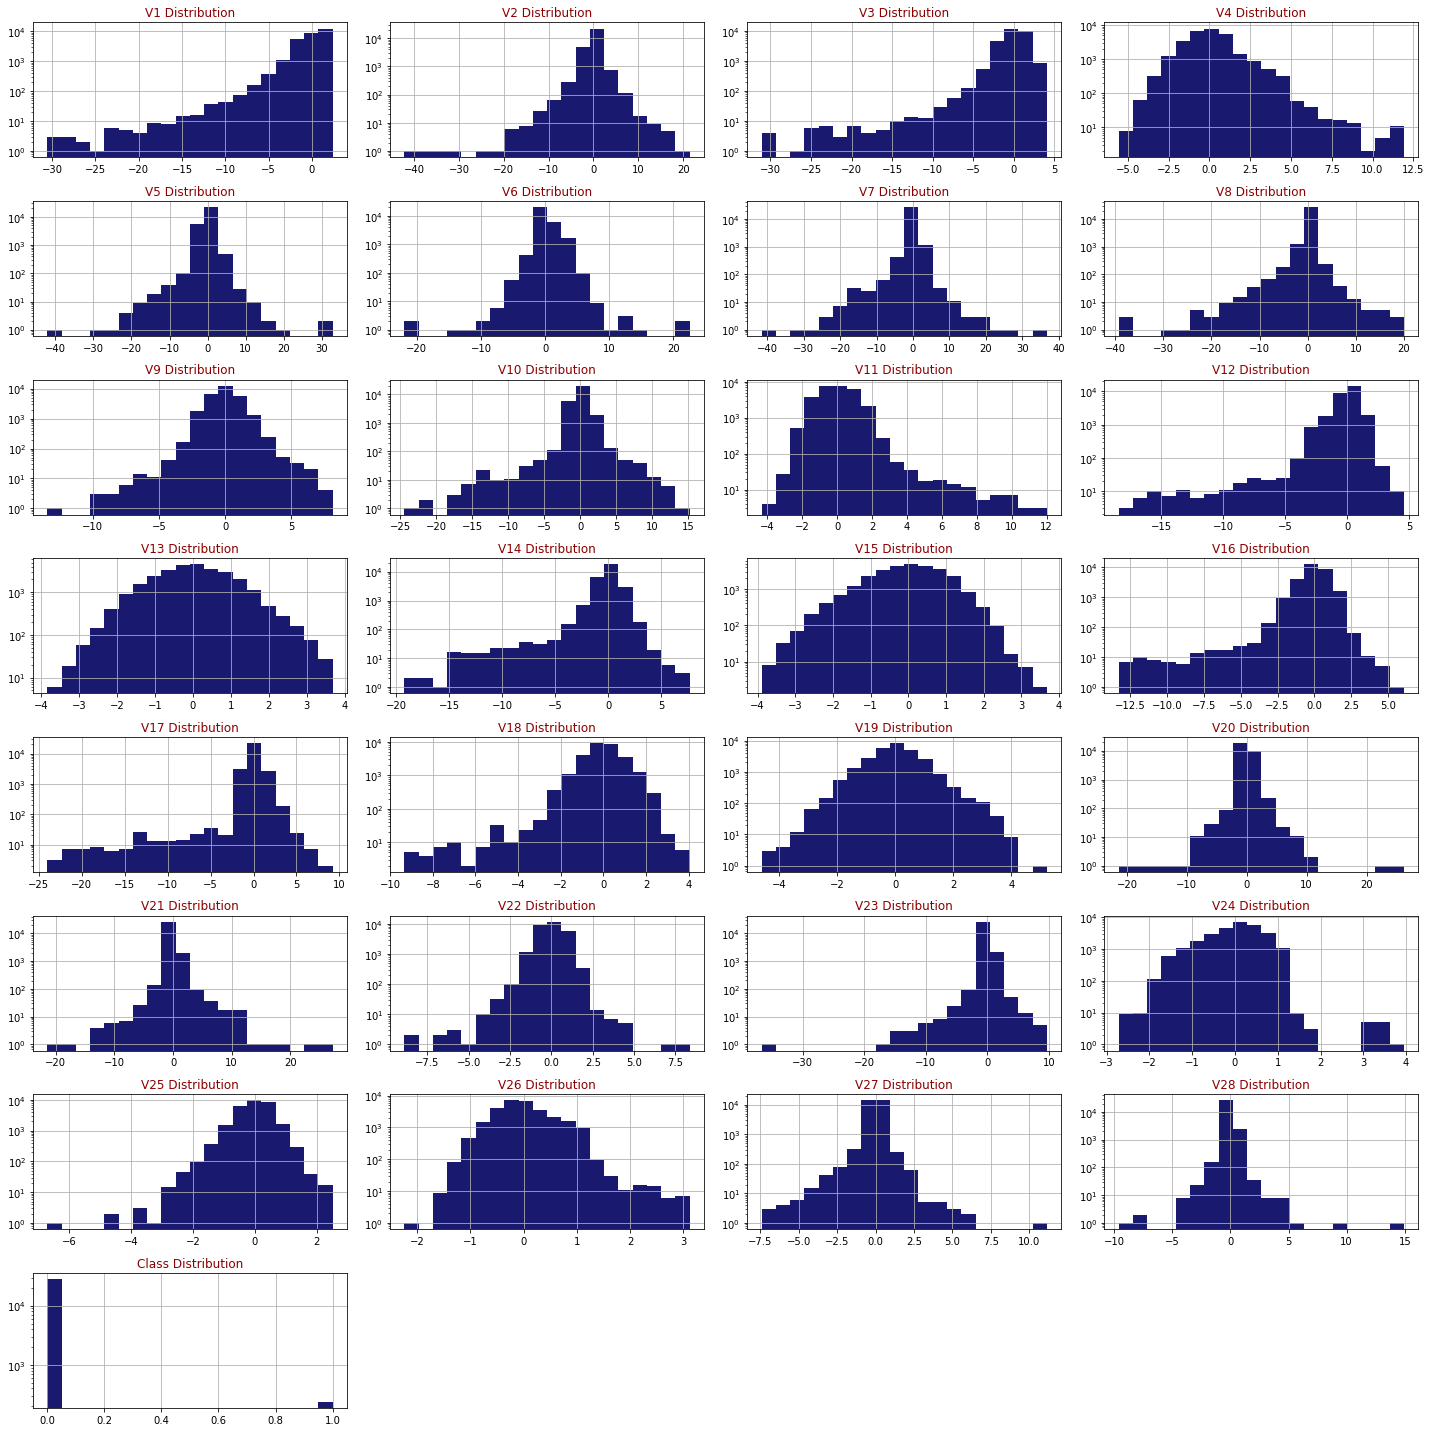

In [9]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

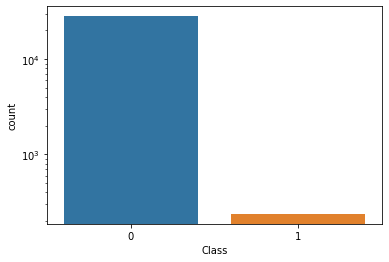

In [10]:
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28455 non-null  float64
 1   V2      28455 non-null  float64
 2   V3      28455 non-null  float64
 3   V4      28455 non-null  float64
 4   V5      28455 non-null  float64
 5   V6      28455 non-null  float64
 6   V7      28455 non-null  float64
 7   V8      28455 non-null  float64
 8   V9      28455 non-null  float64
 9   V10     28455 non-null  float64
 10  V11     28455 non-null  float64
 11  V12     28455 non-null  float64
 12  V13     28455 non-null  float64
 13  V14     28455 non-null  float64
 14  V15     28455 non-null  float64
 15  V16     28455 non-null  float64
 16  V17     28455 non-null  float64
 17  V18     28455 non-null  float64
 18  V19     28455 non-null  float64
 19  V20     28455 non-null  float64
 20  V21     28455 non-null  float64
 21  V22     28455 non-null  float64
 22

In [12]:
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

X1 = data[estimators]
y = data['Class']

In [18]:
X = sm.add_constant(X1) #상수항 결합
reg_logit = sm.Logit(y,X) # 로지스틱회귀
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.010691
         Iterations 12


In [19]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                28455
Model:                          Logit   Df Residuals:                    28426
Method:                           MLE   Df Model:                           28
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.7789
Time:                        15:15:36   Log-Likelihood:                -304.20
converged:                       True   LL-Null:                       -1375.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6518      0.283    -27.060      0.000      -8.206      -7.098
V1             0.0734      0.073      1.004      0.316      -0.070       0.217
V2            -0.0691      0.096     -0.721      0.471      -0.257       0.119
V3            -0.0081      0.084     -0.097      0.923      -0.172       0.156
V4             0.8480      0.134      6.319      0.000       0.585       1.111
V5             0.0237      0.124      0.192      0.848      -0.219       0.266
V6            -0.2133      0.160     -1.334      0.182      -0.527       0.100
V7            -0.0150      0.105     -0.142      0.887      -0.221       0.191
V8            -0.2183      0.070     -3.136      0.002      -0.355      -0.082
V9            -0.0239      0.205     -0.117      0.907      -0.426       0.378
V10           -0.8071      0.204     -3.957      0.000      -1.207      -0.407
V11            0.0804      0.136      0.591      0.555      -0.186       0.347
V12           -0.3065      0.142     -2.156      0.031      -0.585      -0.028
V13           -0.2054      0.135     -1.520      0.128      -0.470       0.059
V14           -0.5241      0.109     -4.825      0.000      -0.737      -0.311
V15           -0.2116      0.151     -1.404      0.160      -0.507       0.084
V16           -0.2644      0.239     -1.107      0.268      -0.733       0.204
V17            0.0846      0.122      0.693      0.488      -0.155       0.324
V18           -0.2196      0.234     -0.937      0.349      -0.679       0.240
V19           -0.0500      0.176     -0.284      0.776      -0.395       0.295
V20           -0.3080      0.132     -2.327      0.020      -0.567      -0.049
V21            0.4499      0.119      3.778      0.000       0.216       0.683
V22            0.6796      0.226      3.011      0.003       0.237       1.122
V23           -0.1216      0.102     -1.188      0.235      -0.322       0.079
V24            0.1396      0.294      0.475      0.635      -0.436       0.715
V25           -0.1349      0.242     -0.556      0.578      -0.610       0.340
V26           -0.4505      0.345     -1.306      0.192      -1.126       0.226
V27           -0.7928      0.288     -2.753      0.006      -1.357      -0.228
V28           -0.1312      0.185     -0.711      0.477      -0.493       0.230
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Feature Selection: Backward elemination (P-value approach)

In [22]:
col=X1.columns[:-1]

def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,data.Class,col)

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                28455
Model:                          Logit   Df Residuals:                    28428
Method:                           MLE   Df Model:                           26
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                    -inf
Time:                        15:17:50   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -1375.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.6160      0.038    -96.346      0.000      -3.690      -3.542
V2             3.6137      0.039     92.058      0.000       3.537       3.691
V3            -8.1047      0.083    -97.331      0.000      -8.268      -7.941
V4             4.7776      0.050     95.323      0.000       4.679       4.876
V5            -5.5781      0.059    -95.266      0.000      -5.693      -5.463
V6            -1.9268      0.023    -83.084      0.000      -1.972      -1.881
V7           -10.5665      0.109    -96.638      0.000     -10.781     -10.352
V8             2.5370      0.029     86.396      0.000       2.479       2.595
V9            -5.2308      0.056    -93.621      0.000      -5.340      -5.121
V10          -12.0925      0.125    -96.633      0.000     -12.338     -11.847
V11            8.4204      0.088     96.212      0.000       8.249       8.592
V12          -15.2085      0.157    -97.125      0.000     -15.515     -14.902
V13            0.1616      0.016     10.131      0.000       0.130       0.193
V14          -15.7035      0.161    -97.256      0.000     -16.020     -15.387
V15           -0.3423      0.018    -19.195      0.000      -0.377      -0.307
V16          -14.3132      0.148    -96.786      0.000     -14.603     -14.023
V17          -25.9287      0.266    -97.453      0.000     -26.450     -25.407
V18           -9.6584      0.100    -96.270      0.000      -9.855      -9.462
V19            3.1185      0.037     83.540      0.000       3.045       3.192
V20            2.0131      0.035     57.676      0.000       1.945       2.082
V21            2.2191      0.031     70.481      0.000       2.157       2.281
V22            0.1665      0.022      7.519      0.000       0.123       0.210
V23           -0.1343      0.033     -4.123      0.000      -0.198      -0.070
V24           -0.1488      0.026     -5.693      0.000      -0.200      -0.098
V25            0.5944      0.033     17.975      0.000       0.530       0.659
V26            0.2031      0.033      6.186      0.000       0.139       0.268
V27            2.5946      0.054     48.208      0.000       2.489       2.700
==============================================================================
"""

V28 변수만 삭제해줘도 p-value의 값이 상대적으로 큰 변수가 사라진다 

In [25]:
new_features=data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

### **$\beta$ 값 확인하기**

In [33]:
#칼럼에 따른 beta, exp(beta) 확인
column_name=["const",'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27']
beta=np.concatenate([logreg.intercept_,logreg.coef_.reshape(-1)]).round(2)
odds=np.exp(beta).round(2)
interpret=np.where(beta>0,"risky","protective")

#beta 해석
beta_analysis=pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=["beta","exp(beta)","interprt"])
beta_analysis

,beta,exp(beta),interprt
const,-7.57,0.0,protective
V1,0.06,1.06,risky
V2,-0.06,0.94,protective
V3,0.05,1.05,risky
V4,0.8,2.23,risky
V5,-0.01,0.99,protective
V6,-0.23,0.79,protective
V7,-0.05,0.95,protective
V8,-0.23,0.79,protective
V9,0.05,1.05,risky


### Test

In [38]:
logreg.predict_proba(x_test)

#패키지 이용하지 않고 직접 계산하는 경우

#beta 곱하기 X
xbeta=np.matmul(np.c_[np.ones(x_test.shape[0]),x_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-xbeta))
P_1

array([[2.71453664e-03],
       [1.47417822e-01],
       [9.89385821e-05],
       ...,
       [2.73846846e-04],
       [3.76316327e-04],
       [1.61950711e-04]])

## 성능평가하기

### f1 score

In [42]:
# f1 score
from sklearn.metrics import *
f1_score(y_pred, y_test)

0.6933333333333334

In [43]:
confusion_matrix(y_pred, y_test)

array([[5642,   22],
       [   1,   26]], dtype=int64)

분류결과는 true 중 실제는 true : 5642

분류결과는 true중 실제는 false : 22

분류결과는 false중 실제는 true : 1

분류결과는 false중 실제는 false: 26

### **cutoff 조절**

In [40]:
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score

Cut_off=np.linspace(0.01,0.99,10) #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  #cutoff 보다 크면 1 (유방암), 아니면 0 (유방암 X)
  acc=accuracy_score(y_true=y_test,y_pred=y_pred) #정확도
  recall=recall_score(y_true=y_test,y_pred=y_pred) #민감도
  precision=precision_score(y_true=y_test,y_pred=y_pred) #정밀도

  print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}")

정확도 :  0.98 민감도 :  0.92 정밀도 :  0.25 cut off :  0.01
정확도 :  1.00 민감도 :  0.81 정밀도 :  0.85 cut off :  0.12
정확도 :  1.00 민감도 :  0.77 정밀도 :  0.88 cut off :  0.23
정확도 :  1.00 민감도 :  0.77 정밀도 :  0.90 cut off :  0.34
정확도 :  1.00 민감도 :  0.75 정밀도 :  0.90 cut off :  0.45
정확도 :  1.00 민감도 :  0.75 정밀도 :  0.90 cut off :  0.55
정확도 :  1.00 민감도 :  0.75 정밀도 :  0.90 cut off :  0.66
정확도 :  1.00 민감도 :  0.71 정밀도 :  0.94 cut off :  0.77
정확도 :  1.00 민감도 :  0.69 정밀도 :  0.94 cut off :  0.88
정확도 :  1.00 민감도 :  0.54 정밀도 :  0.96 cut off :  0.99


정확도: 예측결과가 True일때, 실제값도 True인것
민감도: 실제 True인 것 중에서 모델이 True라고 분류한 것의 비율
정밀도: 모델이 True로 분류한 것 중에서 실제값이 True인 비율

ROC 곡선그리기

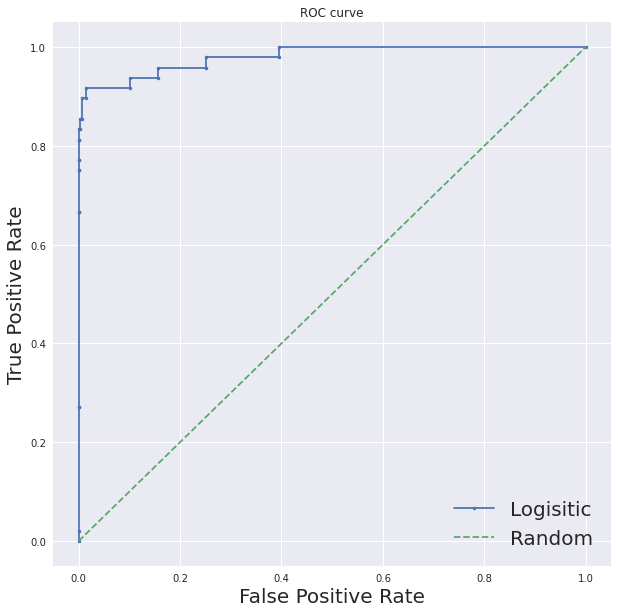

In [46]:
#X_test에 대해 y=1(유방암)일 확률
probs=logreg.predict_proba(x_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 유방암 유무를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(x_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

## 성능개선

In [48]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(x_train)
train_data_standardScaled = standardScaler.transform(x_train)
test_data_standardScaled = standardScaler.transform(x_test)

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_data_standardScaled,y_train)
y_pred=logreg.predict(test_data_standardScaled)

logreg.predict_proba(test_data_standardScaled)

#패키지 이용하지 않고 직접 계산하는 경우

#beta 곱하기 X
xbeta=np.matmul(np.c_[np.ones(test_data_standardScaled.shape[0]),test_data_standardScaled],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-xbeta))
P_1

confusion_matrix(y_pred, y_test)

array([[5639,   12],
       [   4,   36]], dtype=int64)

In [50]:
# f1 score
from sklearn.metrics import *
f1_score(y_pred, y_test)

0.8181818181818182

standardscaler를 해주니 정오표기준 오분류된 개수가 23개에서 16개로 줄어들었고

fl score도 0.69에서 0.81로 올라갔다